# Tabular Kaggle Project

# Define Project

* Provide Project link.

https://github.com/Aelroe/FinalProject_Mushroom.git

* Short paragraph describing the challenge.

This project focuses on creating a reliable system to classify mushrooms as edible or poisonous. The challenge lies in handling a fully categorical dataset, extracting meaningful patterns, and optimizing machine learning models to achieve high accuracy. Key goals include identifying significant features, comparing model performances, and ensuring efficient implementation.

* Briefly describe the data.

The dataset contains 8,124 records, each representing a mushroom sample with 23 categorical attributes. It’s balanced, with no missing values, making it ideal for classification tasks. Features such as odor, gill-size, and gill-color are highly influential in predicting mushroom edibility.

# Data Loading and Initial Look

* Load the data.

In [6]:
import pandas as pd

filename = "mushrooms.csv"
# Load the dataset
df = pd.read_csv(filename)

print(df.head())

print(df.info())

  class cap-shape cap-surface cap-color bruises odor gill-attachment  \
0     p         x           s         n       t    p               f   
1     e         x           s         y       t    a               f   
2     e         b           s         w       t    l               f   
3     p         x           y         w       t    p               f   
4     e         x           s         g       f    n               f   

  gill-spacing gill-size gill-color  ... stalk-surface-below-ring  \
0            c         n          k  ...                        s   
1            c         b          k  ...                        s   
2            c         b          n  ...                        s   
3            c         n          n  ...                        s   
4            w         b          k  ...                        s   

  stalk-color-above-ring stalk-color-below-ring veil-type veil-color  \
0                      w                      w         p          w   
1       

Count the number of rows (data points) and features.

In [8]:
num_rows, num_features = df.shape

print(f"Number of rows (data points): {num_rows}")
print(f"Number of features: {num_features}")

Number of rows (data points): 8124
Number of features: 23


Any missing values?

In [9]:
missing_values = df.isnull().sum()

print("Missing values: ")
print(missing_values)

Missing values: 
class                       0
cap-shape                   0
cap-surface                 0
cap-color                   0
bruises                     0
odor                        0
gill-attachment             0
gill-spacing                0
gill-size                   0
gill-color                  0
stalk-shape                 0
stalk-root                  0
stalk-surface-above-ring    0
stalk-surface-below-ring    0
stalk-color-above-ring      0
stalk-color-below-ring      0
veil-type                   0
veil-color                  0
ring-number                 0
ring-type                   0
spore-print-color           0
population                  0
habitat                     0
dtype: int64


Make a table, where each row is a feature or collection of features:

Is the feature categorical or numerical

What values?

e.g. for categorical: "0,1,2"

e.g. for numerical specify the range

How many missing values

Do you see any outliers?

Define outlier.

In [11]:
# Create a summary table for the dataset
summary = []

for column in df.columns:
    feature_type = "Categorical" if df[column].dtype == "object" else "Numerical"
    values = df[column].unique() if feature_type == "Categorical" else f"{df[column].min()} to {df[column].max()}"
    missing_values = df[column].isnull().sum()
    # Placeholder for outlier detection (we'll analyze it after)
    outliers = "To be defined"
    
    summary.append({
        "Feature": column,
        "Type": feature_type,
        "Values": values if feature_type == "Categorical" else f"Range: {values}",
        "Missing Values": missing_values,
        "Outliers": outliers
    })

# Convert the summary into a DataFrame for better visualization
summary_table = pd.DataFrame(summary)

from IPython.display import display
display(summary_table)

,Feature,Type,Values,Missing Values,Outliers
0,class,Categorical,"[p, e]",0,To be defined
1,cap-shape,Categorical,"[x, b, s, f, k, c]",0,To be defined
2,cap-surface,Categorical,"[s, y, f, g]",0,To be defined
3,cap-color,Categorical,"[n, y, w, g, e, p, b, u, c, r]",0,To be defined
4,bruises,Categorical,"[t, f]",0,To be defined
5,odor,Categorical,"[p, a, l, n, f, c, y, s, m]",0,To be defined
6,gill-attachment,Categorical,"[f, a]",0,To be defined
7,gill-spacing,Categorical,"[c, w]",0,To be defined
8,gill-size,Categorical,"[n, b]",0,To be defined
9,gill-color,Categorical,"[k, n, g, p, w, h, u, e, b, r, y, o]",0,To be defined


In [12]:
# Analyze frequencies of each value in the categorical features
for column in df.columns:
    print(f"Feature: {column}")
    print(df[column].value_counts())
    print("-" * 30)

Feature: class
class
e    4208
p    3916
Name: count, dtype: int64
------------------------------
Feature: cap-shape
cap-shape
x    3656
f    3152
k     828
b     452
s      32
c       4
Name: count, dtype: int64
------------------------------
Feature: cap-surface
cap-surface
y    3244
s    2556
f    2320
g       4
Name: count, dtype: int64
------------------------------
Feature: cap-color
cap-color
n    2284
g    1840
e    1500
y    1072
w    1040
b     168
p     144
c      44
u      16
r      16
Name: count, dtype: int64
------------------------------
Feature: bruises
bruises
f    4748
t    3376
Name: count, dtype: int64
------------------------------
Feature: odor
odor
n    3528
f    2160
y     576
s     576
a     400
l     400
p     256
c     192
m      36
Name: count, dtype: int64
------------------------------
Feature: gill-attachment
gill-attachment
f    7914
a     210
Name: count, dtype: int64
------------------------------
Feature: gill-spacing
gill-spacing
c    6812
w    1312

I checked the frequency of values in each feature to find outliers. Outliers here are rare categories (like c in cap-shape) or irregular entries (like ? in stalk-root). I did this to spot anomalies and identify features, like veil-type, that may not help with classification.

For classification is there class imbalance?

What is the target:

Classification: how is the target encoded (e.g. 0 and 1)?

Regression: what is the range?

In [13]:
# Check for class imbalance
class_counts = df['class'].value_counts()
print("Class counts:")
print(class_counts)

# Determine target encoding
print("\nTarget encoding for classification:")
print(df['class'].unique())

Class counts:
class
e    4208
p    3916
Name: count, dtype: int64

Target encoding for classification:
['p' 'e']


I checked the class distribution and found no significant imbalance, with 4,208 edible (e) and 3,916 poisonous (p) mushrooms. The target for classification is the class column, currently encoded as e and p. For regression, since this is a classification task, the regression part isn’t applicable here.

# Data Visualization

For classification: compare histogram every feature between the classes. Lots of examples of this in class.

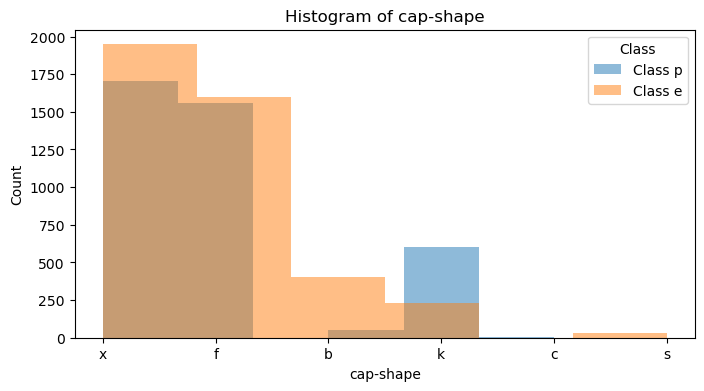

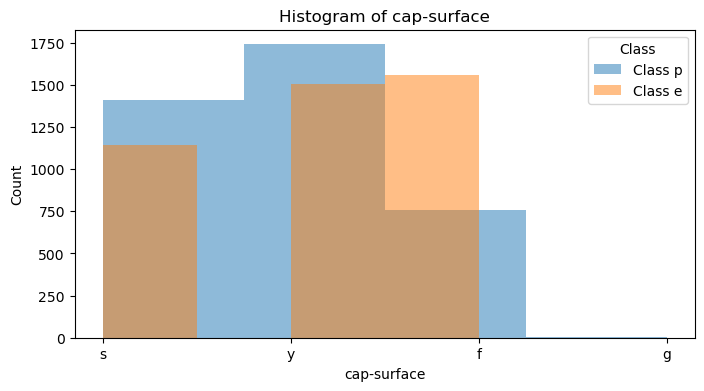

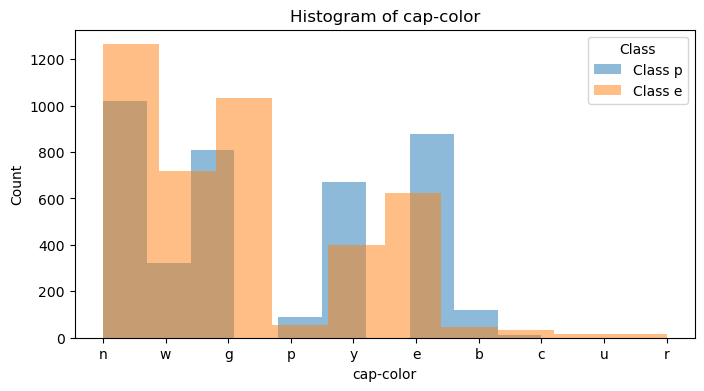

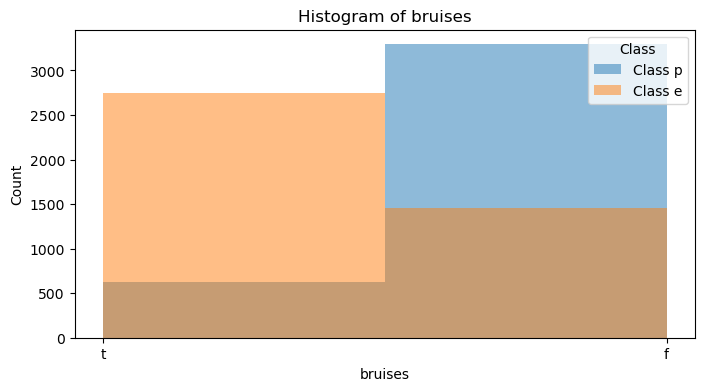

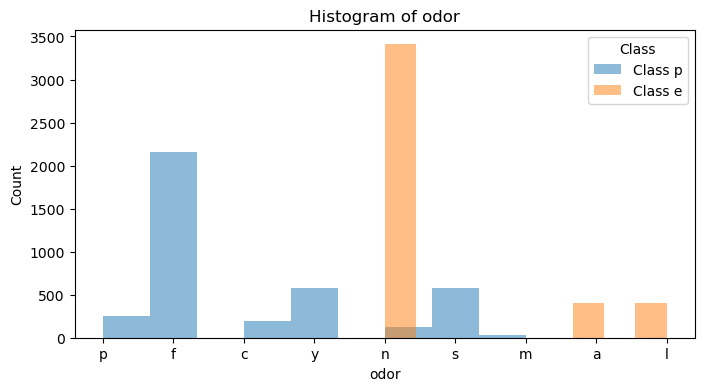

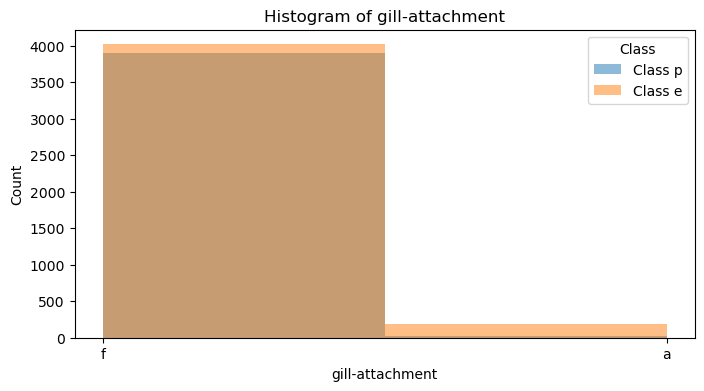

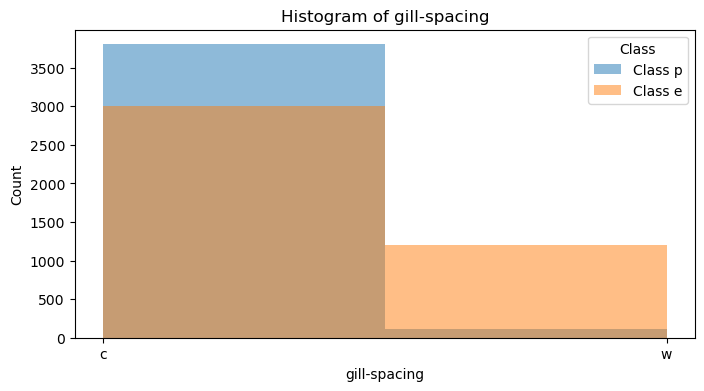

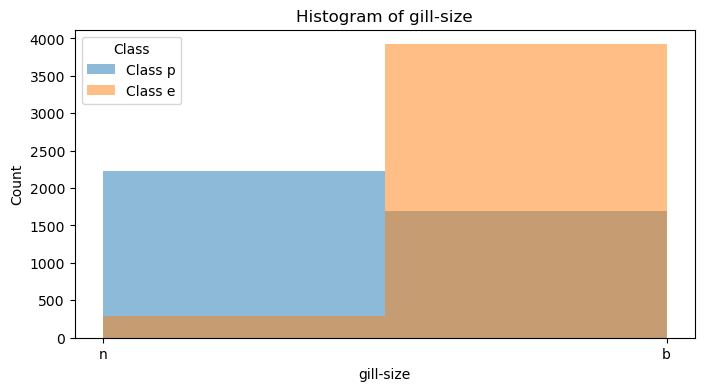

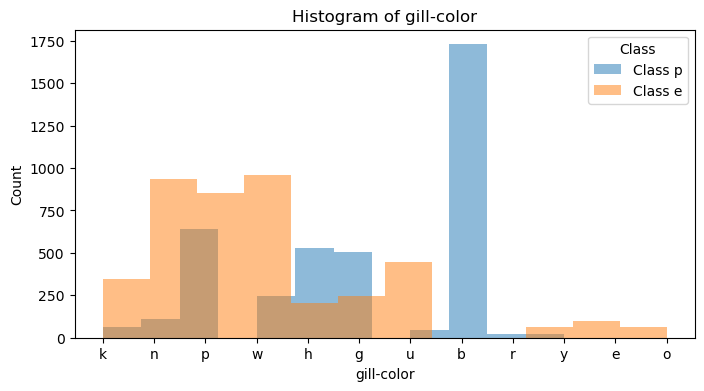

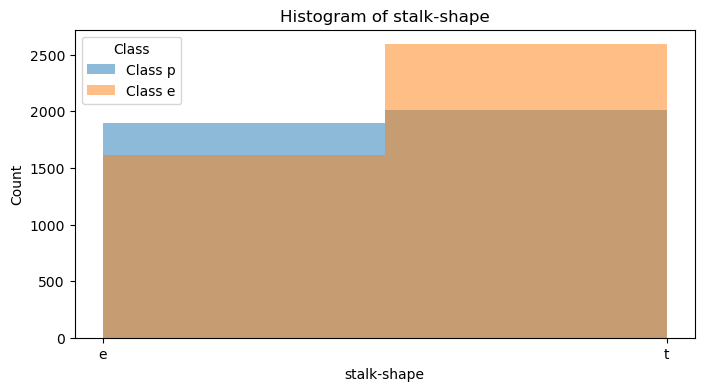

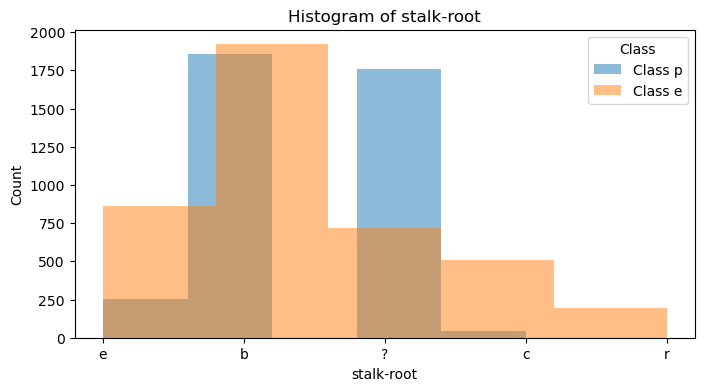

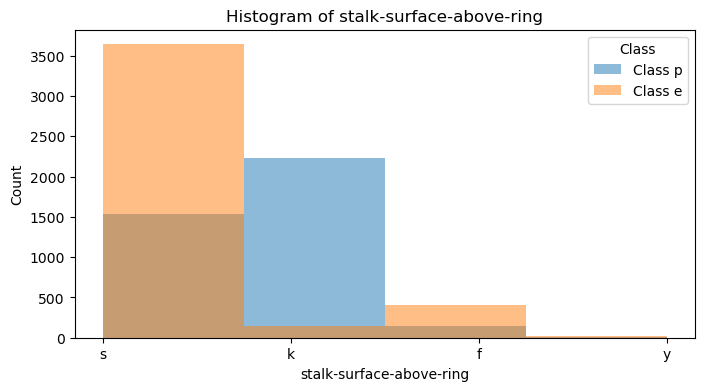

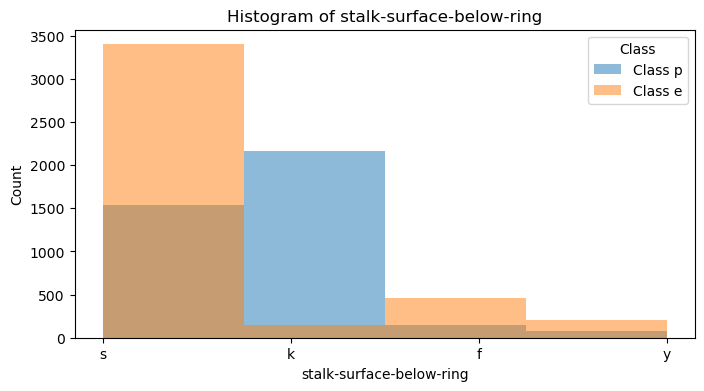

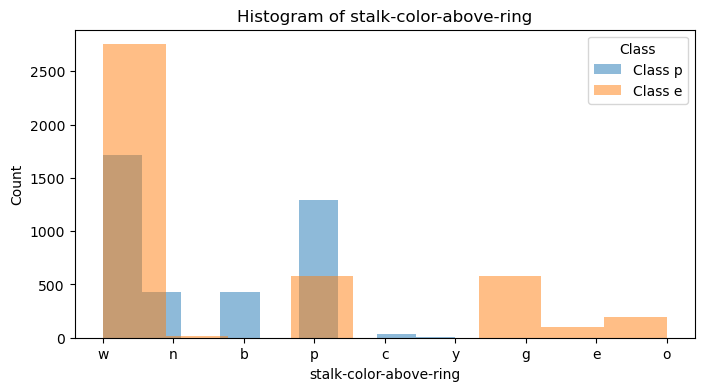

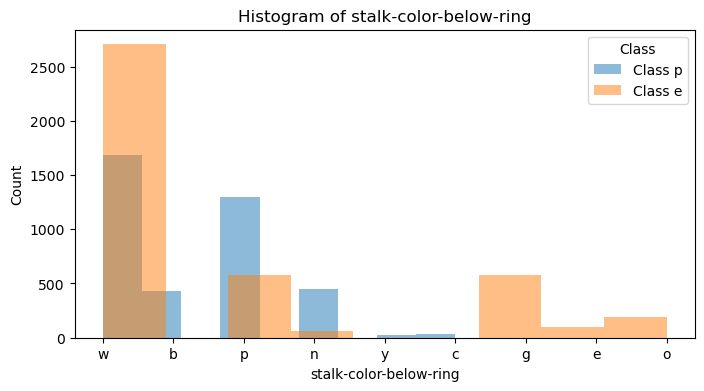

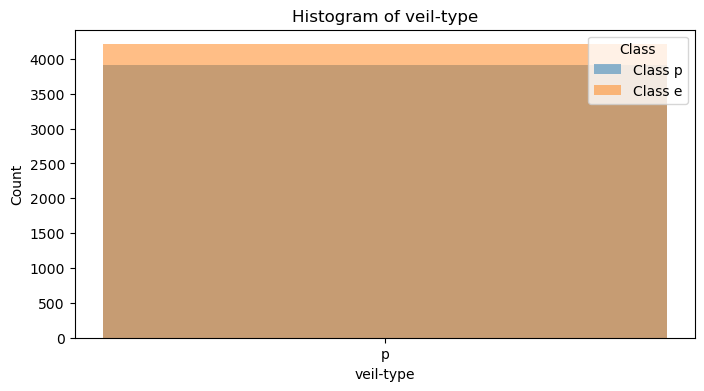

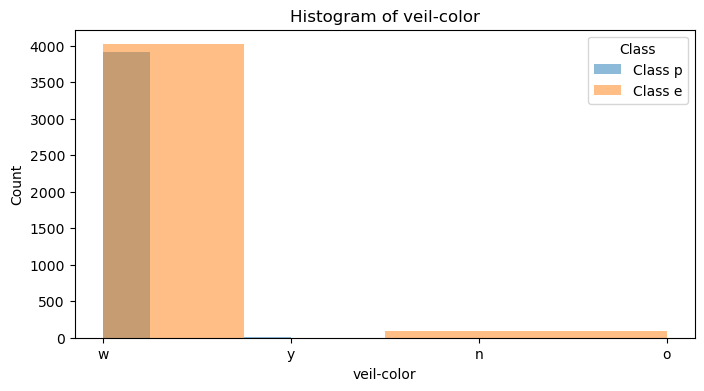

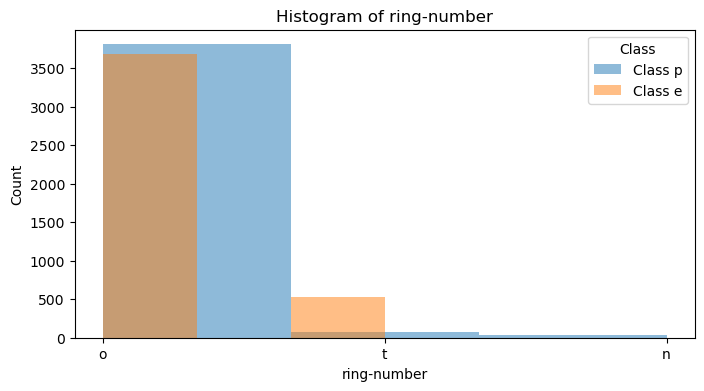

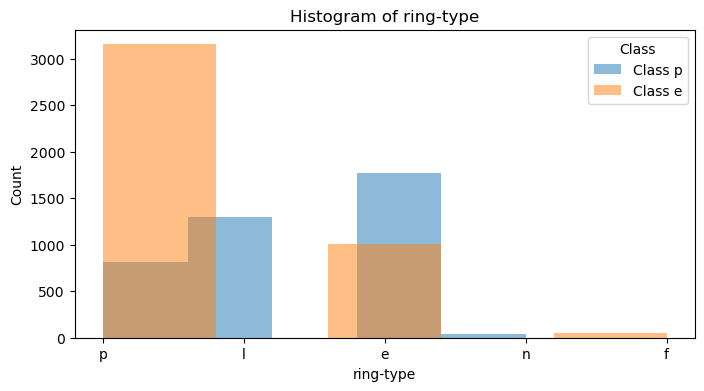

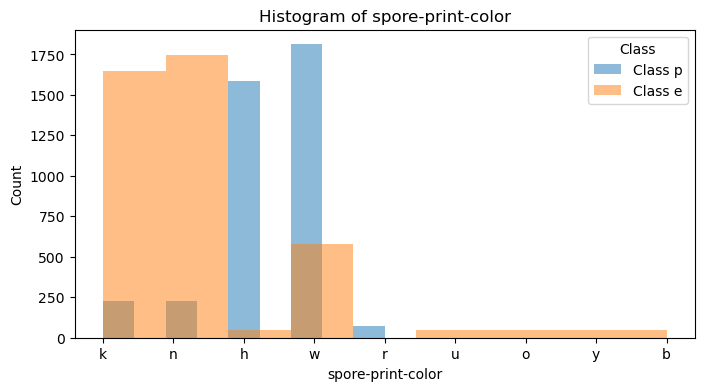

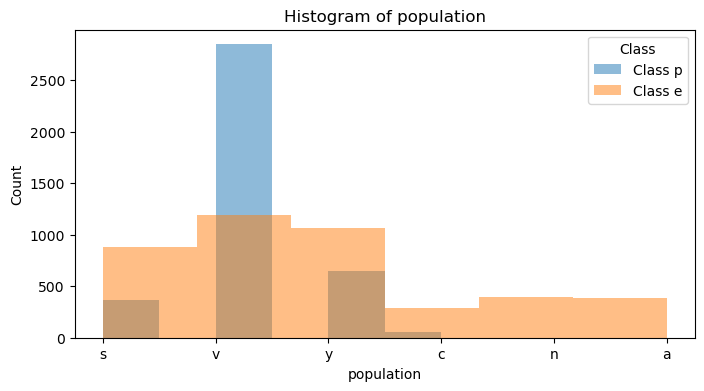

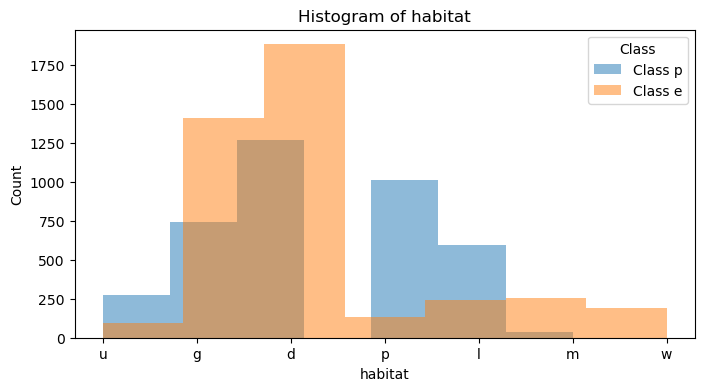

In [14]:
import matplotlib.pyplot as plt

# Compare histograms for every feature between the classes
features = df.columns.drop('class')  # Exclude the target column
for feature in features:
    plt.figure(figsize=(8, 4))
    for cls in df['class'].unique():
        subset = df[df['class'] == cls]
        plt.hist(subset[feature], bins=len(df[feature].unique()), alpha=0.5, label=f"Class {cls}")
    plt.title(f"Histogram of {feature}")
    plt.xlabel(feature)
    plt.ylabel("Count")
    plt.legend(title="Class")
    plt.show()

For regression:

Define 2 or more class based on value of the regression target.

For example: if regression target is between 0 and 1:

0.0-0.25: Class 1

0.25-0.5: Class 2

0.5-0.75: Class 3

0.75-1.0: Class 4

Compare histograms of the features between the classes.

I decided not to include the solution to this task in my project because the mushroom dataset is designed for classification, not regression. Simulating regression bins doesn't align with the project's goals of classifying mushrooms as edible or poisonous based on categorical features. Instead, my focus will remain on tasks like encoding, feature selection, and building accurate classification models.

Note that for categorical features, often times the information in the histogram could be better presented in a table.

Make comments on what features look most promising for ML task.

In [22]:
# Create a summary table for categorical features
categorical_features = df.columns.drop('class')  # Exclude the target column
summary = []

for feature in categorical_features:
    value_counts = df.groupby('class')[feature].value_counts().unstack(fill_value=0)
    summary.append(value_counts)

# Combine all summaries into one DataFrame for easier analysis
summary_table = pd.concat(summary, keys=categorical_features)

display(summary_table)

b       c       f       k       s  \
                         class                                           
cap-shape                e       404.0     0.0  1596.0   228.0    32.0   
                         p        48.0     4.0  1556.0   600.0     0.0   
cap-surface              e         NaN     NaN  1560.0     NaN  1144.0   
                         p         NaN     NaN   760.0     NaN  1412.0   
cap-color                e        48.0    32.0     NaN     NaN     NaN   
                         p       120.0    12.0     NaN     NaN     NaN   
bruises                  e         NaN     NaN  1456.0     NaN     NaN   
                         p         NaN     NaN  3292.0     NaN     NaN   
odor                     e         NaN     0.0     0.0     NaN     0.0   
                         p         NaN   192.0  2160.0     NaN   576.0   
gill-attachment          e         NaN     NaN  4016.0     NaN     NaN   
                         p         NaN     NaN  3898.0     NaN     NaN   
gill-spacing             e         NaN  3008.0     NaN     NaN     NaN   
                         p         NaN  3804.0     NaN     NaN     NaN   
gill-size                e      3920.0     NaN     NaN     NaN     NaN   
                         p      1692.0     NaN     NaN     NaN     NaN   
gill-color               e         0.0     NaN     NaN   344.0     NaN   
                         p      1728.0     NaN     NaN    64.0     NaN   
stalk-shape              e         NaN     NaN     NaN     NaN     NaN   
                         p         NaN     NaN     NaN     NaN     NaN   
stalk-root               e      1920.0   512.0     NaN     NaN     NaN   
                         p      1856.0    44.0     NaN     NaN     NaN   
stalk-surface-above-ring e         NaN     NaN   408.0   144.0  3640.0   
                         p         NaN     NaN   144.0  2228.0  1536.0   
stalk-surface-below-ring e         NaN     NaN   456.0   144.0  3400.0   
                         p         NaN     NaN   144.0  2160.0  1536.0   
stalk-color-above-ring   e         0.0     0.0     NaN     NaN     NaN   
                         p       432.0    36.0     NaN     NaN     NaN   
stalk-color-below-ring   e         0.0     0.0     NaN     NaN     NaN   
                         p       432.0    36.0     NaN     NaN     NaN   
veil-color               e         NaN     NaN     NaN     NaN     NaN   
                         p         NaN     NaN     NaN     NaN     NaN   
ring-number              e         NaN     NaN     NaN     NaN     NaN   
                         p         NaN     NaN     NaN     NaN     NaN   
ring-type                e         NaN     NaN    48.0     NaN     NaN   
                         p         NaN     NaN     0.0     NaN     NaN   
spore-print-color        e        48.0     NaN     NaN  1648.0     NaN   
                         p         0.0     NaN     NaN   224.0     NaN   
population               e         NaN   288.0     NaN     NaN   880.0   
                         p         NaN    52.0     NaN     NaN   368.0   
habitat                  e         NaN     NaN     NaN     NaN     NaN   
                         p         NaN     NaN     NaN     NaN     NaN   

                                     x       g       y       e       n  ...  \
                         class                                          ...   
cap-shape                e      1948.0     NaN     NaN     NaN     NaN  ...   
                         p      1708.0     NaN     NaN     NaN     NaN  ...   
cap-surface              e         NaN     0.0  1504.0     NaN     NaN  ...   
                         p         NaN     4.0  1740.0     NaN     NaN  ...   
cap-color                e         NaN  1032.0   400.0   624.0  1264.0  ...   
                         p         NaN   808.0   672.0   876.0  1020.0  ...   
bruises                  e         NaN     NaN     NaN     NaN     NaN  ...   
                         p         NaN     NaN     NaN     NaN     Na

The NaN values appear because not all classes (e and p) have all the possible values for each feature. For example, if a specific value only exists for the p class, the e class will show NaN for that value.

**Make comments on what features look most promising for ML task.** 
The most promising features for classification are odor, gill-size, gill-color, and bruises because they show clear differences between edible and poisonous mushrooms. Features like veil-type can be dropped since they don’t provide any useful information. Other features like cap-shape and population show some variability but may be less impactful.

# Data Cleaning and Preperation for Machine Learning

Visualizing features BEFORE cleaning:


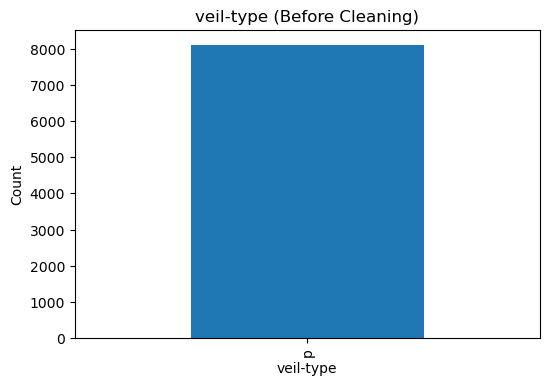

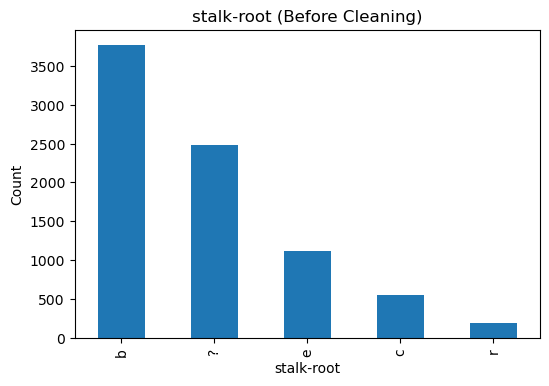

In [26]:
# Load the original dataset
df_original = pd.read_csv("mushrooms.csv")

# Visualization of features BEFORE cleaning
print("Visualizing features BEFORE cleaning:")
for feature in ['veil-type', 'stalk-root']:  # Features we plan to clean
    if feature in df_original.columns:
        plt.figure(figsize=(6, 4))
        df_original[feature].value_counts().plot(kind='bar', title=f"{feature} (Before Cleaning)")
        plt.xlabel(feature)
        plt.ylabel("Count")
        plt.show()


Perform any data cleaning. Be clear what are you doing, for what feature.

In [27]:
# Make a copy of the original dataset to clean
df_cleaned = df_original.copy()

# Drop irrelevant features
if 'veil-type' in df_cleaned.columns:
    df_cleaned = df_cleaned.drop(columns=['veil-type'])
    print("Dropped 'veil-type' as it has no variability.")

# Replace irregular values in 'stalk-root'
if 'stalk-root' in df_cleaned.columns:
    df_cleaned['stalk-root'] = df_cleaned['stalk-root'].replace('?', 'unknown')
    print("Replaced '?' in 'stalk-root' with 'unknown'.")

Dropped 'veil-type' as it has no variability.
Replaced '?' in 'stalk-root' with 'unknown'.


Determinine if rescaling is important for your Machine Learning model.

If so select strategy for each feature.

Apply rescaling.

This task won’t be included in the project because the dataset contains only categorical features, with no numerical features requiring rescaling. Rescaling is typically used for numerical data in distance-based or gradient-based models, which is not applicable here. Instead, the focus will be on one-hot encoding to prepare the categorical features for machine learning.

Visualize the features before and after cleaning and rescaling.

Visualizing features AFTER cleaning:


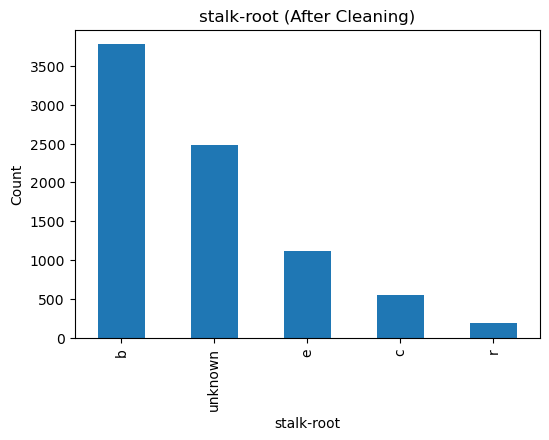

In [28]:
# Visualization of features AFTER cleaning
print("Visualizing features AFTER cleaning:")
for feature in ['stalk-root']:  # Only 'stalk-root' remains after cleaning
    if feature in df_cleaned.columns:
        plt.figure(figsize=(6, 4))
        df_cleaned[feature].value_counts().plot(kind='bar', title=f"{feature} (After Cleaning)")
        plt.xlabel(feature)
        plt.ylabel("Count")
        plt.show()

One-hot encode your categorical features.

In [33]:
# One-hot encode categorical features, excluding the target column 'class'
df_encoded = pd.get_dummies(df_cleaned.drop(columns=['class']), drop_first=True)

# Add the target column back to the encoded dataset
df_encoded['class'] = df_cleaned['class']

# Display the first few rows of the dataset after one-hot encoding
print("First few rows of the dataset after one-hot encoding:")
print(df_encoded.head())

First few rows of the dataset after one-hot encoding:
   cap-shape_c  cap-shape_f  cap-shape_k  cap-shape_s  cap-shape_x  \
0        False        False        False        False         True   
1        False        False        False        False         True   
2        False        False        False        False        False   
3        False        False        False        False         True   
4        False        False        False        False         True   

   cap-surface_g  cap-surface_s  cap-surface_y  cap-color_c  cap-color_e  ...  \
0          False           True          False        False        False  ...   
1          False           True          False        False        False  ...   
2          False           True          False        False        False  ...   
3          False          False           True        False        False  ...   
4          False           True          False        False        False  ...   

   population_s  population_v  populat

# Machine Learning

**Problem Formulation**

Remove unneed columns, for example:

duplicated

categorical features that were turned into one-hot.

features that identify specific rows, like ID number.

make sure your target is properly encoded also.

In [35]:
if df_encoded['class'].dtype != 'int64':  # Ensure 'class' is properly encoded
    df_encoded['class'] = df_encoded['class'].map({'e': 0, 'p': 1})
    print("Encoded target 'class': 'e' -> 0, 'p' -> 1.")

# Remove any duplicated columns, if present
df_encoded = df_encoded.loc[:, ~df_encoded.columns.duplicated()]
print("Removed any duplicated columns, if found.")

# Display the first few rows to confirm the final dataset
print("First few rows of the final dataset ready for ML:")
print(df_encoded.head())

Encoded target 'class': 'e' -> 0, 'p' -> 1.
Removed any duplicated columns, if found.
First few rows of the final dataset ready for ML:
   cap-shape_c  cap-shape_f  cap-shape_k  cap-shape_s  cap-shape_x  \
0        False        False        False        False         True   
1        False        False        False        False         True   
2        False        False        False        False        False   
3        False        False        False        False         True   
4        False        False        False        False         True   

   cap-surface_g  cap-surface_s  cap-surface_y  cap-color_c  cap-color_e  ...  \
0          False           True          False        False        False  ...   
1          False           True          False        False        False  ...   
2          False           True          False        False        False  ...   
3          False          False           True        False        False  ...   
4          False           True       

Split training sample into train, validation, and test sub-samples.

In [36]:
from sklearn.model_selection import train_test_split

# Separate features and target
X = df_encoded.drop(columns=['class'])
y = df_encoded['class']

# Split into train (70%) and temporary (30%) sets
X_train, X_temp, y_train, y_temp = train_test_split(
    X, y, test_size=0.3, random_state=42, stratify=y
)

# Further split the temporary set into validation (15%) and test (15%)
X_val, X_test, y_val, y_test = train_test_split(
    X_temp, y_temp, test_size=0.5, random_state=42, stratify=y_temp
)

# Print the size of each split
print(f"Training set: {X_train.shape[0]} samples")
print(f"Validation set: {X_val.shape[0]} samples")
print(f"Test set: {X_test.shape[0]} samples")

Training set: 5686 samples
Validation set: 1219 samples
Test set: 1219 samples


# Train ML Algorithm

You only need one algorithm to work. You can do more if you like.

For now, focus on making it work, rather than best result.

Try to get a non-trivial result.

In [38]:
import numpy as np
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report

# Convert datasets to contiguous arrays for compatibility with KNN
X_train_contiguous = np.ascontiguousarray(X_train)
X_val_contiguous = np.ascontiguousarray(X_val)

# Initialize classifiers
classifiers = {
    "Logistic Regression": LogisticRegression(random_state=42, max_iter=1000),
    "Random Forest": RandomForestClassifier(random_state=42),
    "K-Nearest Neighbors": KNeighborsClassifier(),
    "Support Vector Machine": SVC(random_state=42)
}

# Train and evaluate each classifier
results = {}
for name, clf in classifiers.items():
    clf.fit(X_train_contiguous, y_train)  # Train the model
    y_pred = clf.predict(X_val_contiguous)  # Make predictions on validation set
    accuracy = accuracy_score(y_val, y_pred)  # Calculate accuracy
    results[name] = accuracy
    print(f"{name} Accuracy: {accuracy:.4f}")
    print(classification_report(y_val, y_pred))

# Print the best performing algorithm
best_algorithm = max(results, key=results.get)
print(f"Best algorithm: {best_algorithm} with accuracy {results[best_algorithm]:.4f}")


Logistic Regression Accuracy: 0.9975
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       631
           1       1.00      0.99      1.00       588

    accuracy                           1.00      1219
   macro avg       1.00      1.00      1.00      1219
weighted avg       1.00      1.00      1.00      1219

Random Forest Accuracy: 1.0000
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       631
           1       1.00      1.00      1.00       588

    accuracy                           1.00      1219
   macro avg       1.00      1.00      1.00      1219
weighted avg       1.00      1.00      1.00      1219

K-Nearest Neighbors Accuracy: 1.0000
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       631
           1       1.00      1.00      1.00       588

    accuracy                           1.00      1219
   macro avg       1.00

Random Forest is a great choice because it’s robust, handles class imbalance well, and provides feature importance, which helps understand the model. It doesn’t assume linearity like Logistic Regression and is less prone to overfitting compared to KNN or SVM.

# Evaluate Performance on Validation Sample

Compute the usual metric for your ML task.

In [40]:
from sklearn.metrics import accuracy_score, classification_report

# Evaluate the chosen model on the validation set 
y_val_pred = classifiers["Random Forest"].predict(X_val_contiguous)  # Use your chosen model

# Compute accuracy
accuracy = accuracy_score(y_val, y_val_pred)
print(f"Validation Accuracy: {accuracy:.4f}")

# Compute classification report
print("\nClassification Report:")
print(classification_report(y_val, y_val_pred))

Validation Accuracy: 1.0000

Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       631
           1       1.00      1.00      1.00       588

    accuracy                           1.00      1219
   macro avg       1.00      1.00      1.00      1219
weighted avg       1.00      1.00      1.00      1219



Compute the score for the kaggle challenge.

In [41]:
# Compute Kaggle challenge score (Accuracy)
kaggle_score = accuracy_score(y_val, y_val_pred)  # Use predictions from the chosen model
print(f"Kaggle Challenge Score (Accuracy): {kaggle_score:.4f}")

Kaggle Challenge Score (Accuracy): 1.0000


# Apply ML to the challenge test set

Once trained, apply the ML algorithm the the test dataset and generate the submission file.

In [44]:
# Predict on the test dataset using your chosen model (e.g., Random Forest)
y_test_pred = classifiers["Random Forest"].predict(X_test)  # Replace "Random Forest" with your final model

# Create the submission DataFrame
submission = pd.DataFrame({
    "Index": X_test.index,  # Use the index or identifier for test samples
    "Prediction": y_test_pred  # Predictions from the chosen model
})

# Save the submission file
submission_file = "submission.csv"
submission.to_csv(submission_file, index=False)
print(f"Submission file '{submission_file}' created successfully.")


Submission file 'submission.csv' created successfully.


/Users/aelroezewdie/anaconda3/lib/python3.11/site-packages/sklearn/base.py:457: UserWarning: X has feature names, but RandomForestClassifier was fitted without feature names
  warnings.warn(
